# In this notebook we will analyse CT-FAN dataset

In [1]:
from os.path import join
from os import listdir
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np
import glob

sns.set(rc={'figure.figsize':(11.7,5), 'figure.dpi':200})

### CT-FAN dataset

In [2]:
data_dev = pd.read_csv('../data/CT-FAN/Task3_english_dev.csv')
data_train = pd.read_csv('../data/CT-FAN/Task3_english_training.csv')
data_concat = pd.concat([data_train, data_dev])
data_concat.rename(columns={'our rating':'label'}, inplace=True)
data_concat['label'] = data_concat['label'].apply(lambda x: x.lower())

data_concat.head()

,public_id,text,title,label
0,5a228e0e,Distracted driving causes more deaths in Canad...,"You Can Be Fined $1,500 If Your Passenger Is U...",false
1,30c605a1,Missouri politicians have made statements afte...,Missouri lawmakers condemn Las Vegas shooting,partially false
2,c3dea290,Home Alone 2: Lost in New York is full of viol...,CBC Cuts Donald Trump's 'Home Alone 2' Cameo O...,partially false
3,f14e8eb6,But things took a turn for the worse when riot...,Obama’s Daughters Caught on Camera Burning US ...,false
4,faf024d6,It’s no secret that Epstein and Schiff share a...,Leaked Visitor Logs Reveal Schiff’s 78 Visits ...,false


In [3]:
counts = data_concat[['public_id', 'label']].groupby(['label']).count()
print(f"Num valid observations : {len(data_concat)}")
print(f"Fake news : " + "{:.2f}".format(counts.loc['false'][0] / len(data_concat)) + "%" )
print(f"Partially false news : " + "{:.2f}".format(counts.loc['partially false'][0] / len(data_concat)) + "%" )
print(f"True news : " + "{:.2f}".format(counts.loc['true'][0] / len(data_concat)) + "%" )
print(f"Other news : " + "{:.2f}".format(counts.loc['other'][0] / len(data_concat)) + "%" )

Num valid observations : 1264
Fake news : 0.46%
Partially false news : 0.28%
True news : 0.17%
Other news : 0.09%


Joining all text into one variable

In [4]:
all_text = ' '.join(data_concat["text"].values[1:])

Define a function to plot word cloud

In [5]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

Adding stop words to remove all text formatting symbols and redundant words

In [6]:
stop_words = ["https", "ul", ".", "org", "wiki", "wikipedia", "will", "image", "s", "t", "m", "ve", "u", "said", "code", "span", "container", "imgur", "html", "jpg", "png", "jpeg", "nofollow", "quot",  "comment", "site", "SE", "tags", "comments", "moderators", "answers", "posts", "stackoverflow", "amp", "strike", "chat", "edit", "alt", "link", "exchange", "help", "votes", "noreferrer", "closed", "png", "h1", "new", "stackexchange", "class","users","questions", "topic", "meta", "stack", "href", "tag", "p", "em", "rel", "li", "user", "answer", "title", "h3", "moderator", "post", "vote", "blockquote", "strong","tagged","question", "img", "page"] + list(STOPWORDS)

Generating word cloud for Fake news dataset

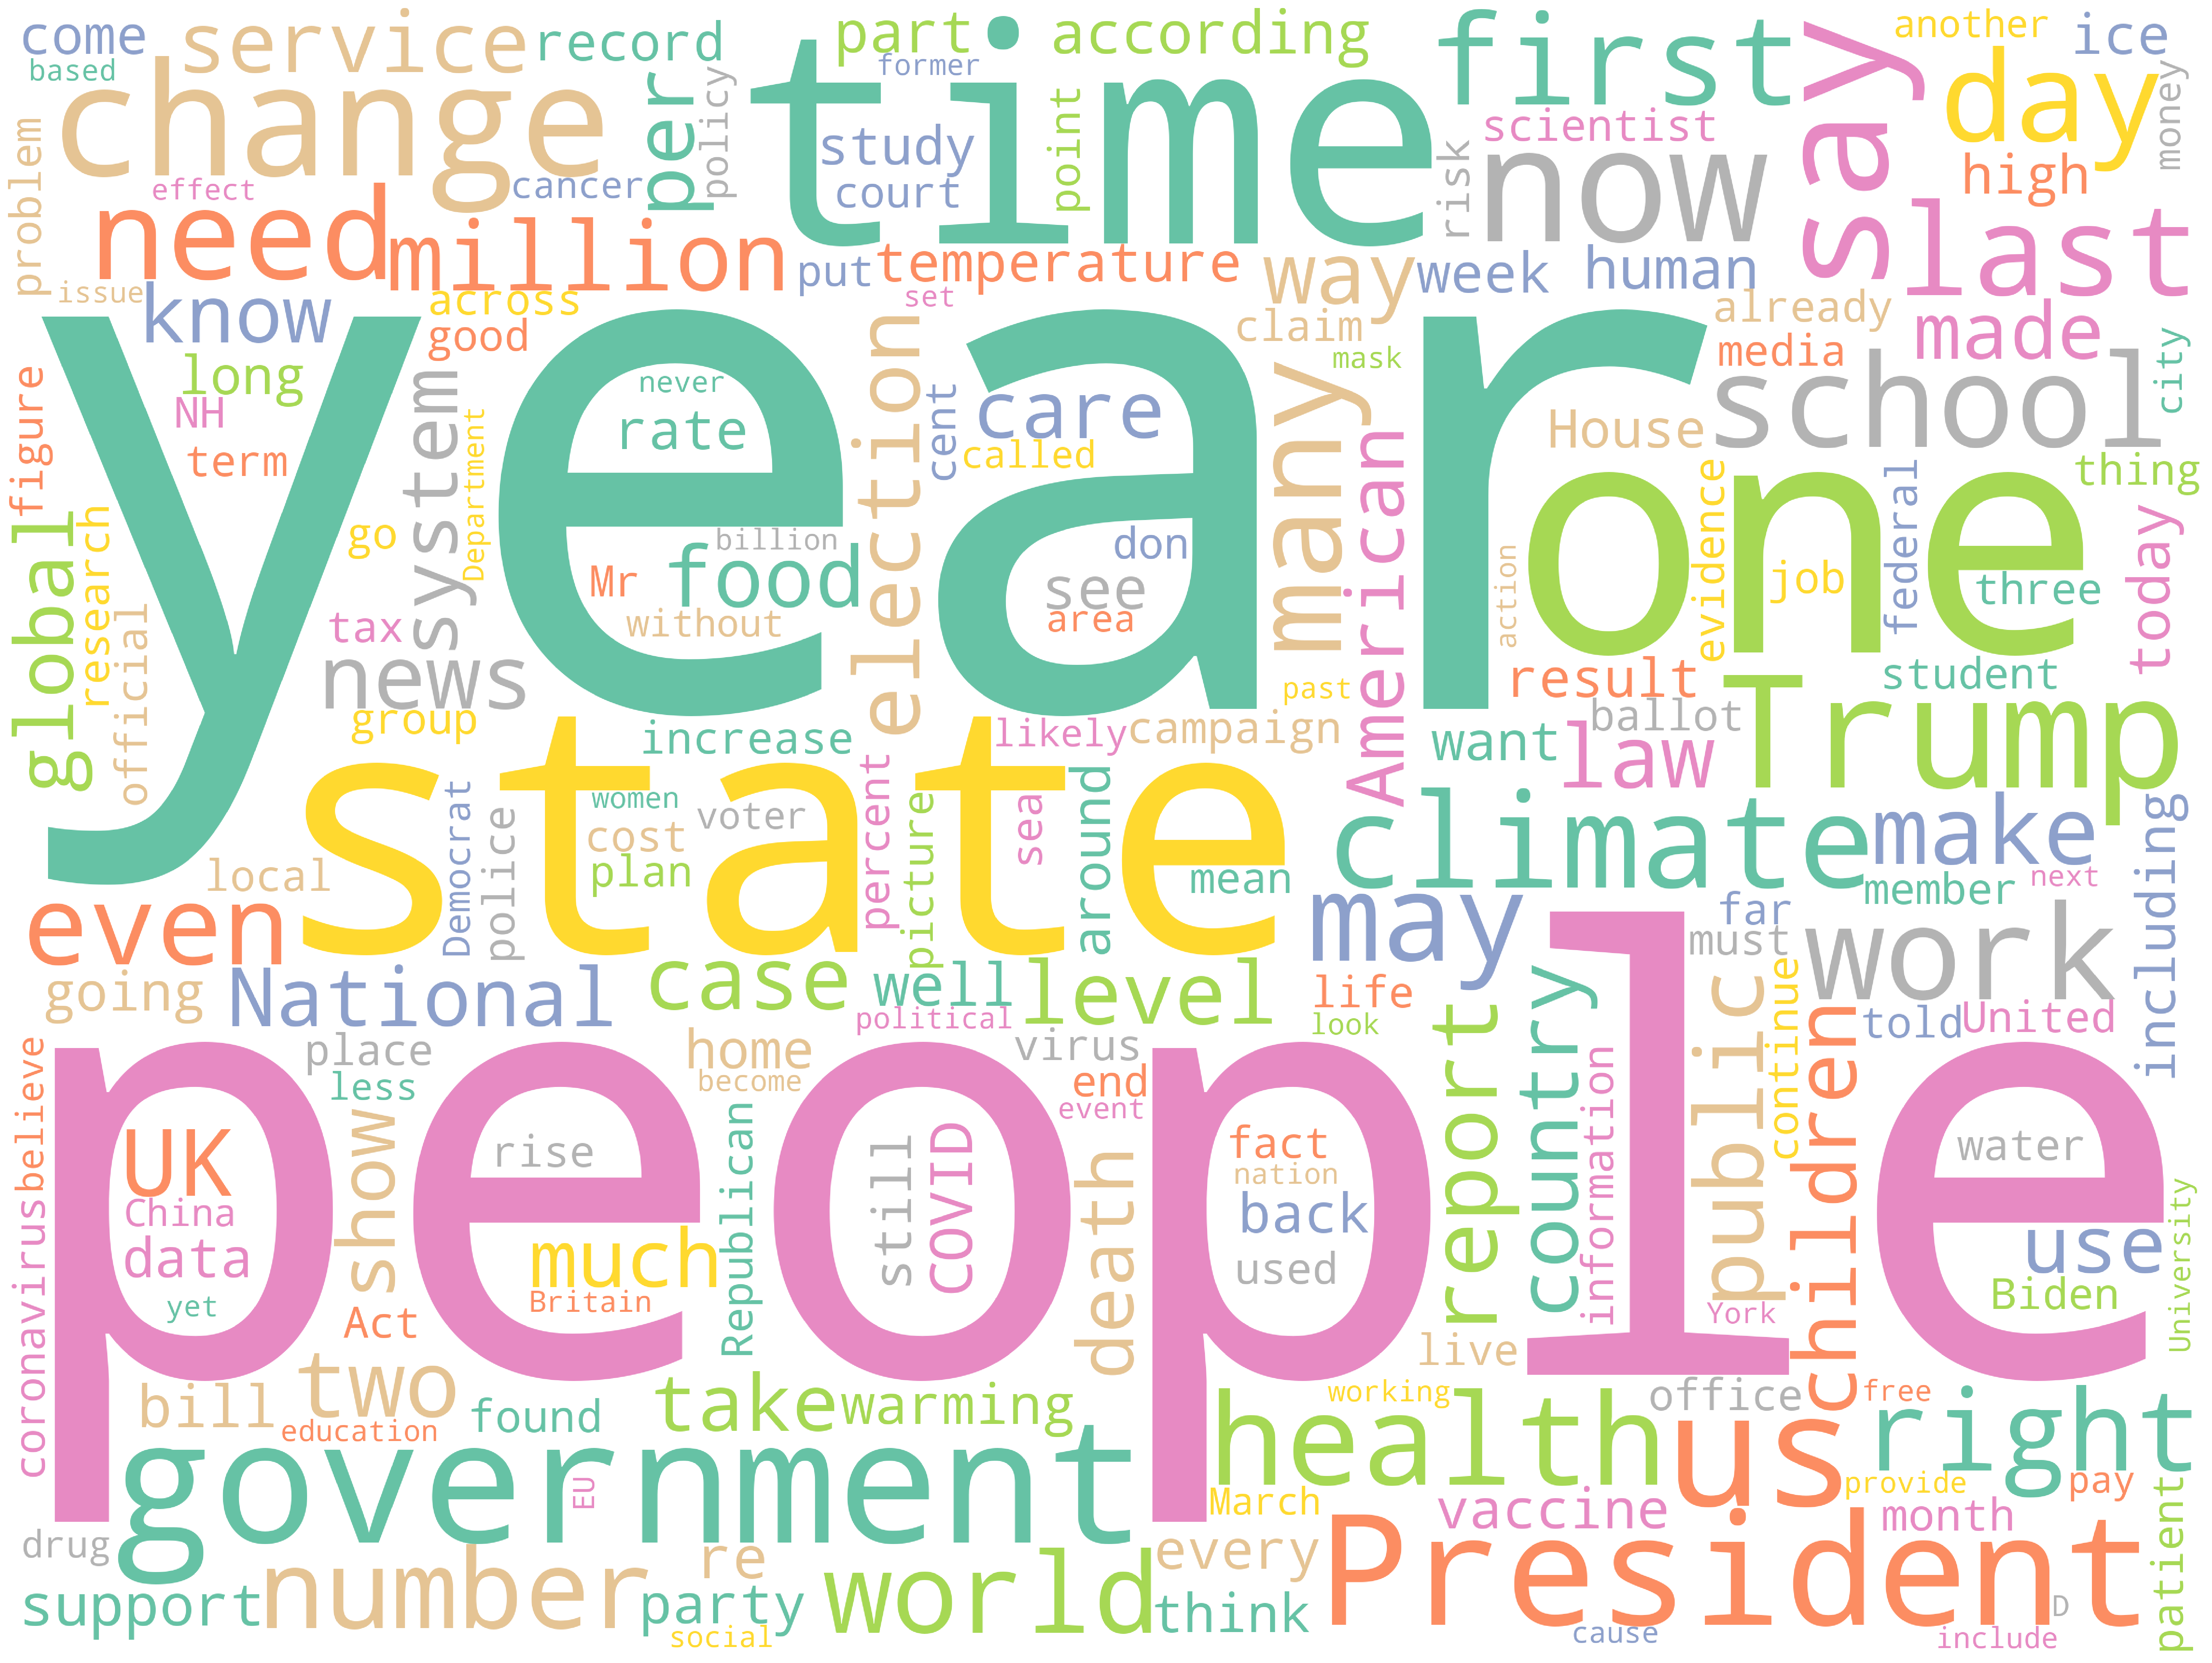

In [7]:
wordcloud = WordCloud(
    width=4000,
    height=3000,
    random_state=1,
    background_color="white",
    colormap="Set2",
    collocations=False,
    stopwords=stop_words,
).generate(all_text)

plot_cloud(wordcloud)

In [8]:
word_count = data_concat["text"].apply(lambda x: len(x)).value_counts().reset_index(level=0).rename(columns = {'index' : 'num_words', 'text' : 'count'})

Showing amount of words we have per article/row (logscaled)

''

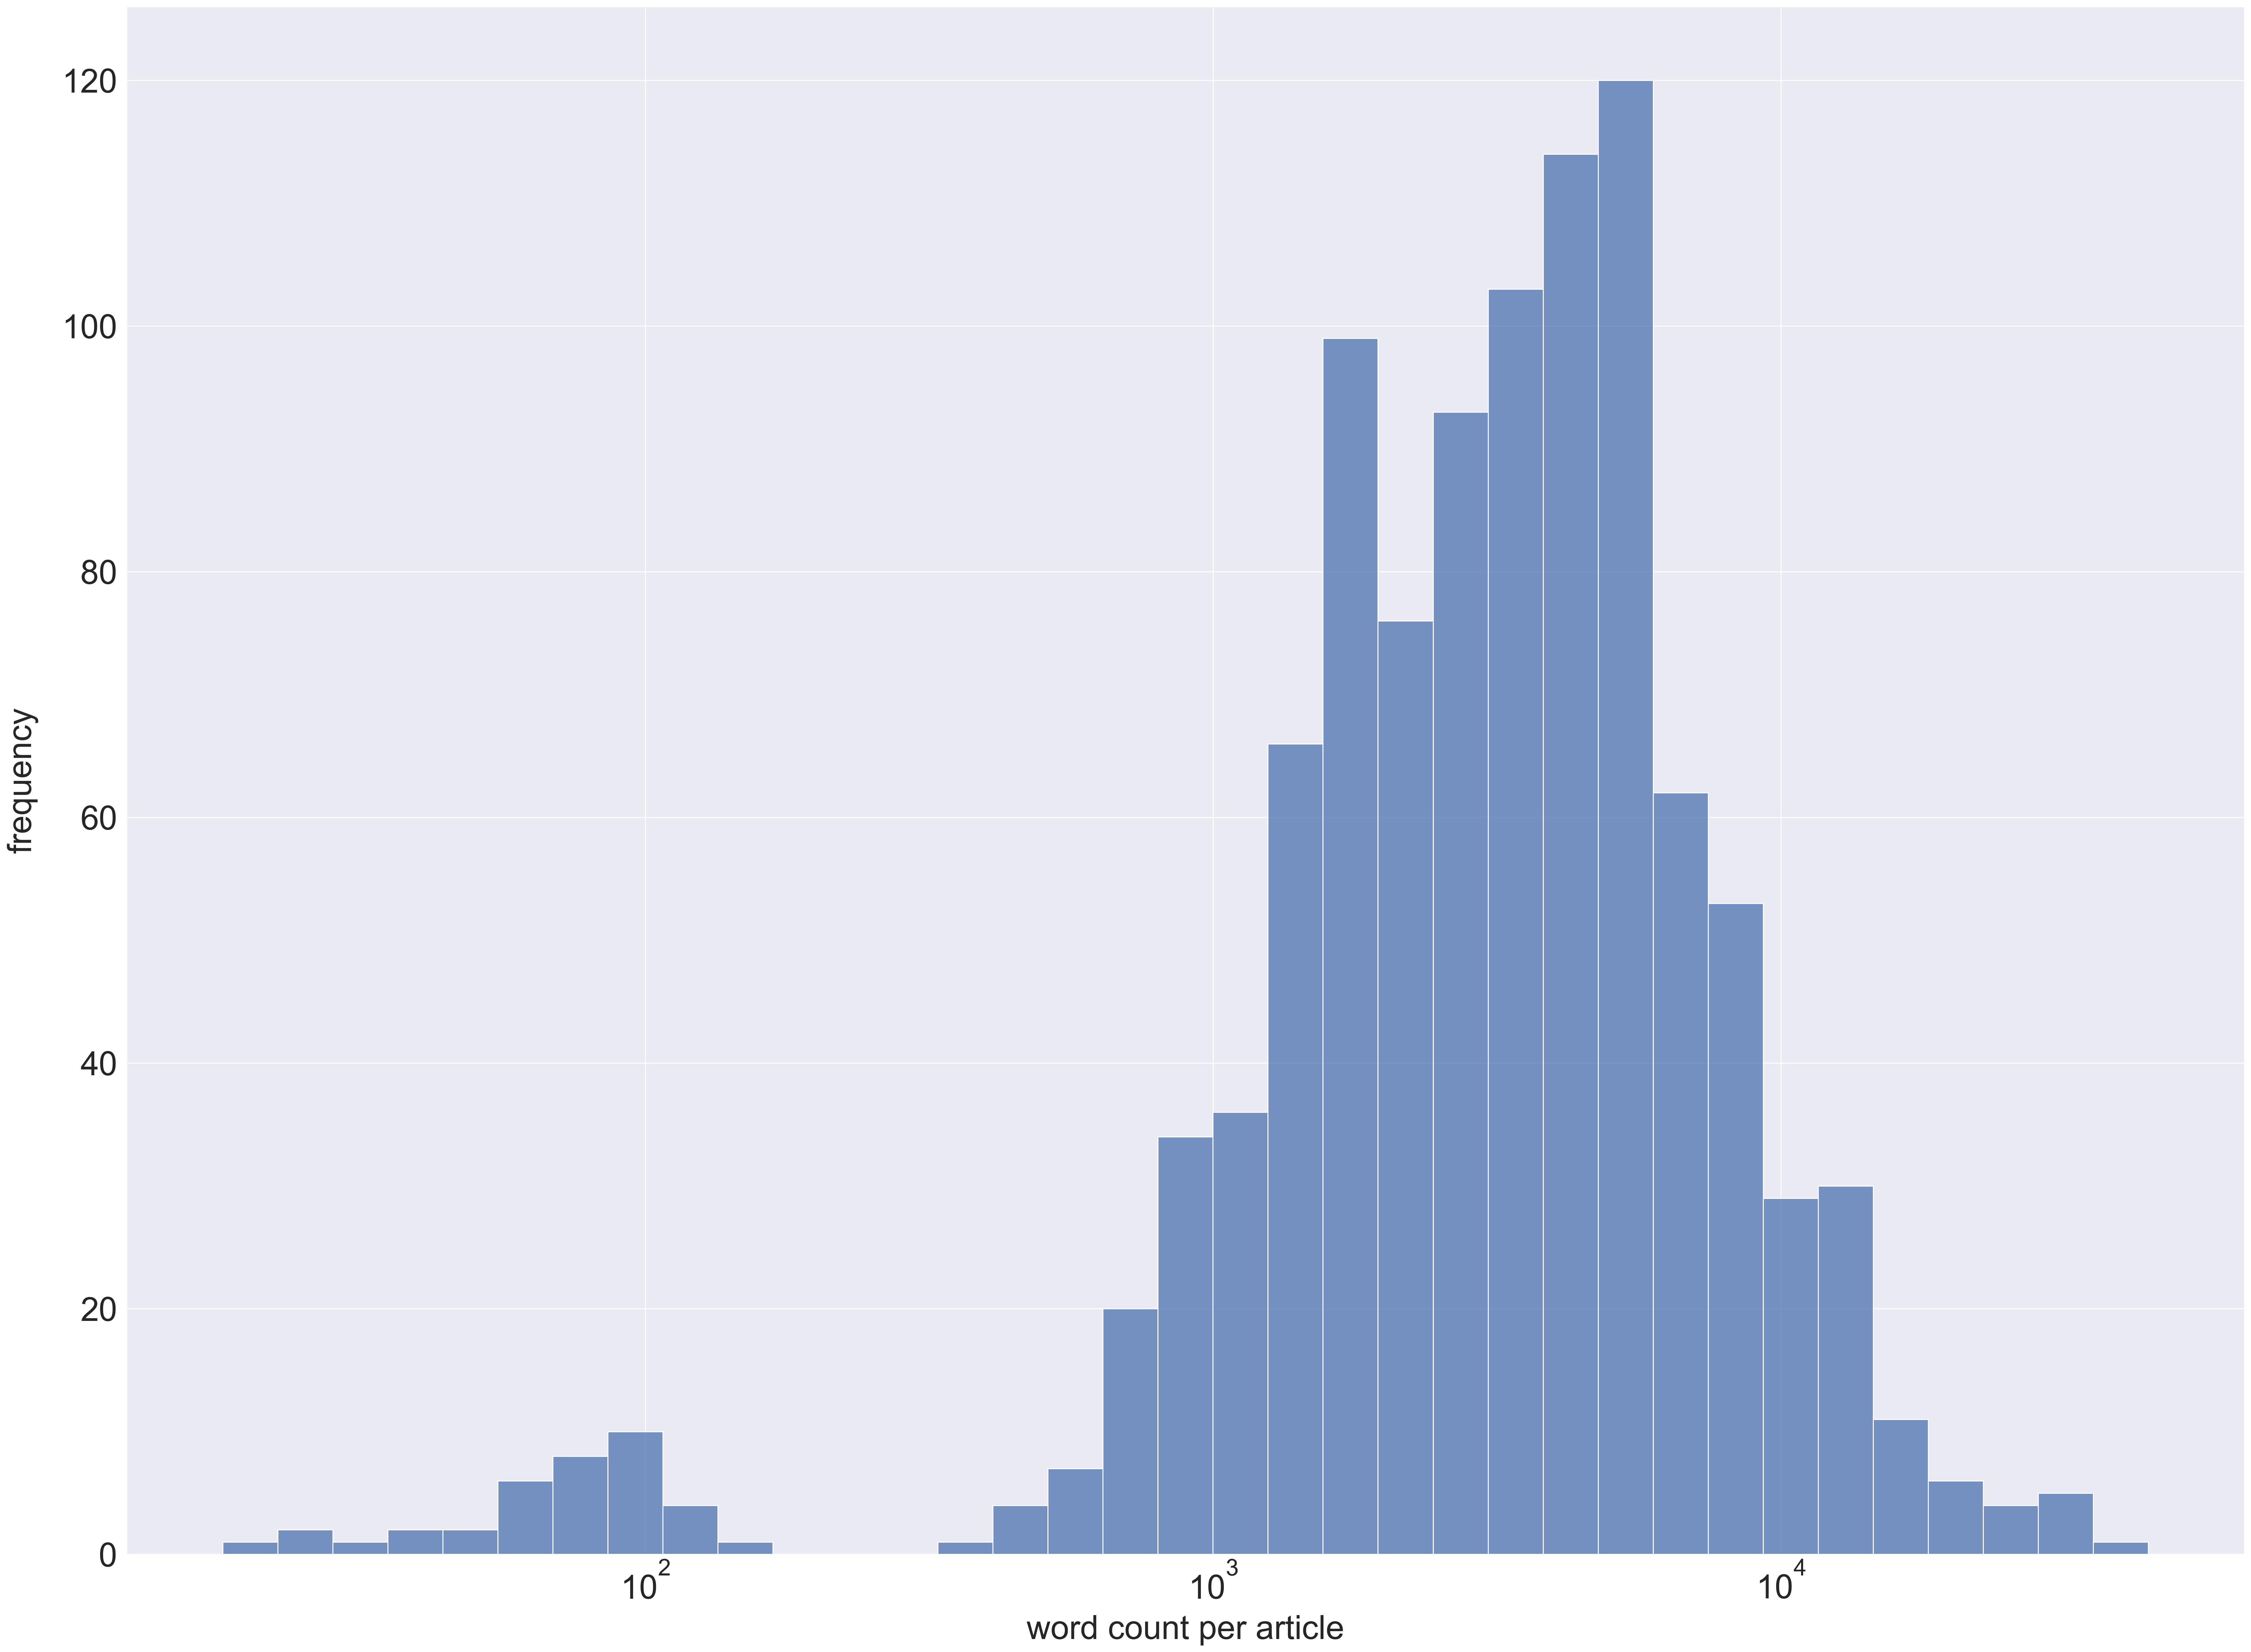

In [9]:
fig, ax = plt.subplots(figsize=(40, 30))
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)

sns.set_style("darkgrid")
ax = sns.histplot(word_count['num_words'].values, log_scale=True)
ax.set_xlabel('word count per article', labelpad=10, fontsize=35)
ax.set_ylabel('frequency', labelpad=25, fontsize=35)